Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [3]:
NAME = "Ananya Roy"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


In [146]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv') #load data
train.head(3) # check the data and header

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [148]:
train.info() # check entries and missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
train_cleaned = train[['Survived','Pclass','Sex','Age','SibSp','Parch']] #remove the unnecessary data
train_cleaned.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0


In [152]:
train_cleaned.info() # look for missing data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [154]:
train_cleaned = train_cleaned.dropna(subset=['Age']) # remove the rows with missing values.
train_cleaned = train_cleaned[train_cleaned["Age"] >= 1] #remove the data with Age< 1

train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  707 non-null    int64  
 1   Pclass    707 non-null    int64  
 2   Sex       707 non-null    object 
 3   Age       707 non-null    float64
 4   SibSp     707 non-null    int64  
 5   Parch     707 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 38.7+ KB


In [156]:
# Loop through each column and print its unique values
for column in train_cleaned.columns:
    unique_values = train_cleaned[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Survived': [0 1]
Unique values in 'Pclass': [3 1 2]
Unique values in 'Sex': ['male' 'female']
Unique values in 'Age': [22.  38.  26.  35.  54.   2.  27.  14.   4.  58.  20.  39.  55.  31.
 34.  15.  28.   8.  19.  40.  66.  42.  21.  18.   3.   7.  49.  29.
 65.  28.5  5.  11.  45.  17.  32.  16.  25.  30.  33.  23.  24.  46.
 59.  71.  37.  47.  14.5 70.5 32.5 12.   9.  36.5 51.  55.5 40.5 44.
  1.  61.  56.  50.  36.  45.5 20.5 62.  41.  52.  63.  23.5 43.  60.
 10.  64.  13.  48.  53.  57.  80.  70.  24.5  6.  30.5 34.5 74. ]
Unique values in 'SibSp': [1 0 3 4 2 5]
Unique values in 'Parch': [0 1 2 5 3 4 6]


In [158]:
# Display the count of unique values in each column
print(train_cleaned.nunique())

Survived     2
Pclass       3
Sex          2
Age         83
SibSp        6
Parch        7
dtype: int64


In [162]:
# Group by "Sex" and "Survived" and count occurrences
sex_survived_counts = train_cleaned.groupby(["Sex", "Survived"]).size()

# Convert to a DataFrame for better readability
sex_survived_counts = sex_survived_counts.reset_index(name="Count")

# Display the results
print(sex_survived_counts)

      Sex  Survived  Count
0  female         0     64
1  female         1    195
2    male         0    360
3    male         1     88


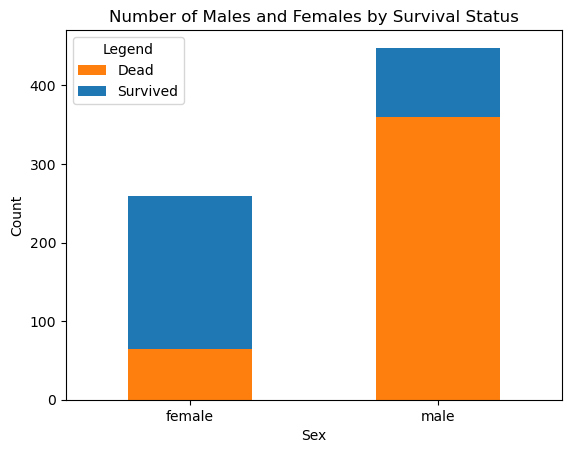

In [202]:
import matplotlib.pyplot as plt

# Group by "Sex" and "Survived" and count occurrences
sex_survived_counts = train_cleaned.groupby(["Sex", "Survived"]).size().unstack()

# Plot the bar chart
sex_survived_counts.plot(kind="bar", stacked=True, color=["#ff7f0e","#1f77b4"])
plt.title("Number of Males and Females by Survival Status")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Dead", "Survived"], title="Legend")
plt.xticks(rotation=0)

# Display the plot
plt.show()

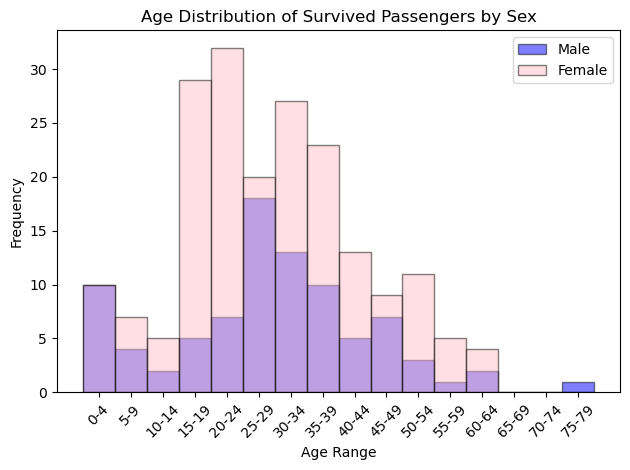

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Filter survived passengers
survived_passengers = train_cleaned[train_cleaned["Survived"] == 1]

# Separate age data for male and female survived passengers
male_ages = survived_passengers[survived_passengers["Sex"] == "male"]["Age"].dropna()
female_ages = survived_passengers[survived_passengers["Sex"] == "female"]["Age"].dropna()

# Define bins for age range
bins = range(0, 81, 5)  # Set bins from age 0 to 80 with an interval of 5 years

# Plot histogram bars for each sex with transparency to differentiate
plt.hist(male_ages, bins=bins, alpha=0.5, label="Male", color="blue", edgecolor="black")
plt.hist(female_ages, bins=bins, alpha=0.5, label="Female", color="pink", edgecolor="black")

# Add titles and labels
plt.title("Age Distribution of Survived Passengers by Sex")
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.legend()

# Create custom x-axis labels for age ranges
age_ranges = [f"{i}-{i+4}" for i in bins[:-1]]
plt.xticks(np.arange(2.5, 80, 5), age_ranges, rotation=45)  # Position labels at center of bins

# Display plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [188]:
# Group by "Pclass" and "Survived" and count occurrences
class_sex_survived_counts = train_cleaned.groupby(["Pclass","Sex", "Survived"]).size()

# Convert to a DataFrame for better readability
class_sex_survived_counts = class_sex_survived_counts.reset_index(name="Count")

# Display the results
print(class_sex_survived_counts)

    Pclass     Sex  Survived  Count
0        1  female         0      3
1        1  female         1     82
2        1    male         0     61
3        1    male         1     39
4        2  female         0      6
5        2  female         1     68
6        2    male         0     84
7        2    male         1     12
8        3  female         0     55
9        3  female         1     45
10       3    male         0    215
11       3    male         1     37


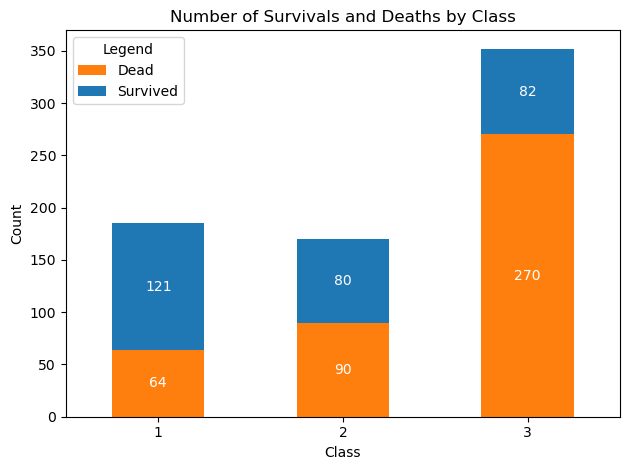

In [230]:
import matplotlib.pyplot as plt

# Group by "Pclass" and "Survived" and count occurrences
class_survived_counts = train_cleaned.groupby(["Pclass", "Survived"]).size().unstack()

# Plot the bar chart
ax = class_survived_counts.plot(kind="bar", stacked=True, color=["#ff7f0e", "#1f77b4"])

# Title and labels
plt.title("Number of Survivals and Deaths by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(["Dead", "Survived"], title="Legend")
plt.xticks(rotation=0)

# Annotate each bar with the count inside the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Position the label in the center of each bar
    y_position = p.get_y() + height / 2  # Position the label vertically in the center of each bar

    # Display the count as a label
    ax.text(x_position, y_position, str(int(height)), ha='center', va='center', color='white')

# Display the plot
plt.tight_layout()
plt.show()

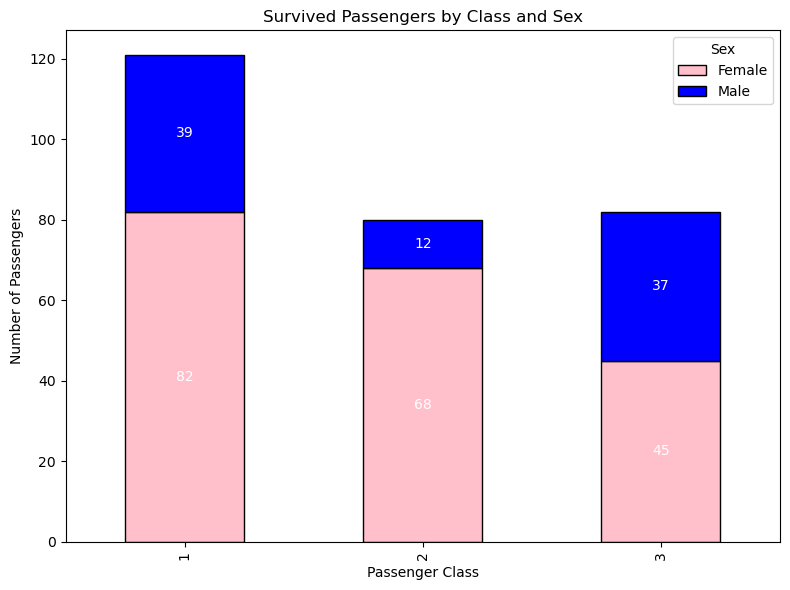

In [214]:
import matplotlib.pyplot as plt

# Filter for only survived passengers
survived_data = train_cleaned[train_cleaned["Survived"] == 1]

# Group by "Pclass" and "Sex" and count occurrences
class_sex_counts = survived_data.groupby(["Pclass", "Sex"]).size().unstack()

# Set up the plot
ax = class_sex_counts.plot(kind='bar', stacked=True, color=['pink','blue'], edgecolor="black", figsize=(8, 6))

# Add labels and title
plt.title("Survived Passengers by Class and Sex")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(["Female", "Male"], title="Sex")

# Annotate each bar with the count inside the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Position the label in the center of each bar
    y_position = p.get_y() + height / 2  # Position the label vertically in the center of each bar

    # Display the count as a label
    ax.text(x_position, y_position, str(int(height)), ha='center', va='center', color='white')

# Display the plot
plt.tight_layout()
plt.show()

In [234]:
# Create a new column 'family_size' by summing 'SibSp' and 'Parch'
train_cleaned['family_size'] = train_cleaned['SibSp'] + train_cleaned['Parch']

# Display the first few rows of the updated dataframe to verify
print(train_cleaned.head(4))


   Survived  Pclass     Sex   Age  SibSp  Parch  family_size
0         0       3    male  22.0      1      0            1
1         1       1  female  38.0      1      0            1
2         1       3  female  26.0      0      0            0
3         1       1  female  35.0      1      0            1


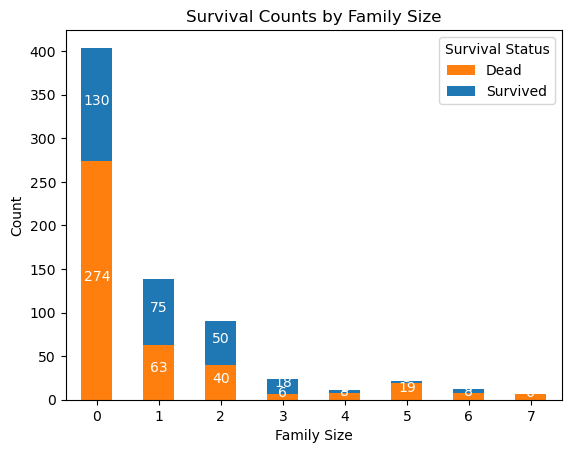

In [238]:
# Group by "family_size" and "Survived" and count occurrences
family_size_survived_counts = train_cleaned.groupby(["family_size", "Survived"]).size().unstack()

# Plot the stacked bar chart
family_size_survived_counts.plot(kind="bar", stacked=True, color=["#ff7f0e", "#1f77b4"])
plt.title("Survival Counts by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(["Dead", "Survived"], title="Survival Status")
plt.xticks(rotation=0)

# Show data labels on bars
for index, row in family_size_survived_counts.iterrows():
    for i, value in enumerate(row):
        if value > 0:
            plt.text(index, row.cumsum()[i] - value / 2, int(value), ha="center", color="white")

plt.show()


**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Answer 1.**
* Females, particularly in the age range of 15-24 years, belonging to passenger class 1 were most likely to survive. Additionally, children aged between 1-4 had higher chances of survival.

* The ratio of "Sex" in data showed that even though there were more males in the ship, the survival rate of females were significantly higher. 
The age distribution of male and female survivors showed a fairly normal distribution where the majority of the female population was in the age range of 15-24 and majority of the male population was in the range of 25-35. However, a clear spike in the distribution can be seen in the 1-4 years old age range which explains that children were given priority. 
Additional exploration was done to see if the passenger class played any role in the survival rate. It was seen that even though there were more passengers in class 3, the majority of the survivors were from class 1. After further exploration within the survived passengers, it was seen that amongst the survived passenger class 1 passengers had the highest survival rate. However, the class of the passenger was not the determinant of the survival rate since it appears that the females had the higher survival rate across all classe.
 

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Answer 2.**
* In addition to Survived, Sex and Age, I used the Pclass for the analysis. I wanted to explore if the passenger class played any role in the survival rate. I grouped the data by the Pclass and counted the number of entries in each class. I found that class 1 had the highest survival rate.

* The list of all attributes used are: Survived, Passenger Class, Age, SibSp, ParCh.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Answer 3.**
* I added a new column "Family_size" by concatenating the SibSp and ParCh. I wanted to conduct additional exploration to find out if the family size or parents with children had any influence on the survival rate. I generated a stacked bar chart with family_size and the survival counts. It was found that 1 parent trvelling with a child, or two; or, a couple travelling with a child, or couples only had higher survival rates. However, this does not reflect a concrete evidence of a correlation between the family size and survival rate.  

* I excluded the passenger ID, name, Ticket, Fare, Cabin, Embarked attributes. I assumed that these attributes are more identifiers and don't provide meaningful information for survival analysis. 

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

**Answer 4.**
* The missing values (i.e., Age) and also Age < 1 were excluded from the analysis. This resulted in loss of data. In future analysis, this could be handled by either imputing with the median age or using a more advanced imputation technique like regression. But, in this analysis, I simply excluded the data which had missing values in the Age column.